In [1]:
# Import dependencies
import numpy as np
import torch
import torchvision
from torch.utils.data.dataset import Dataset
from torchvision import datasets, transforms
from torch import nn, optim
import matplotlib.pyplot as plt

### Problem 4.2 Determine appropriate mini-batch size = 32, epoch = 100

In [2]:
# ################## Part 1: Load data and create batch ##################
N_total = 600
N_train = 500
x = torch.unsqueeze(torch.linspace(0, 1, N_total), dim=1)
r = torch.randperm(N_total)
x = x[r, :]
y = 0.2 + 0.4 * torch.pow(x, 2) + 0.3 * x * torch.sin(15 * x) + 0.05 * torch.cos(50 * x)

class CustomDataset(Dataset):
    def __init__(self, x, y):
        self.y = y
        self.x = x

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        y1 = self.y[idx]
        x1 = self.x[idx]
        return (x1, y1)

# Change batch_size here to test different values
batch_size = 32  # Experiment with different batch sizes: 32, 64, 128
trainset = CustomDataset(x[0:N_train, :], y[0:N_train, :])
testset = CustomDataset(x[N_train:N_total, :], y[N_train:N_total, :])
train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size)

In [3]:
# ################## Part 2: Define Model ##################
model = nn.Sequential(
    nn.Linear(1, 1024, bias=True),
    nn.ReLU(),
    nn.Linear(1024, 1, bias=True)
)

def init_weights(m):
    if isinstance(m, nn.Linear):
        m.weight.data.uniform_(-1, 1)
        m.bias.data.uniform_(-1, 1)

model.apply(init_weights)

Sequential(
  (0): Linear(in_features=1, out_features=1024, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1024, out_features=1, bias=True)
)

In [4]:
# ################## Part 3: Define Loss and Optimizer ##################
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [5]:
# ################## Part 4: Training and Testing ##################
def train_NN():
    model.train()
    for images, labels in train_loader:
        out = model(images)
        loss = criterion(out, labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    return loss

def test_NN(loader):
    model.eval()
    loss = 0
    with torch.no_grad():
        for images, labels in loader:
            out = model(images)
            loss += criterion(out, labels).item()
    loss = loss / len(loader)
    return loss

# Experiment with different numbers of epochs
N_epoch = 100 
train_loss = np.zeros((N_epoch, 1))
test_loss = np.zeros((N_epoch, 1))

for epoch in range(N_epoch):
    train_NN()
    train_loss[epoch, 0] = test_NN(train_loader)
    test_loss[epoch, 0] = test_NN(test_loader)
    print(f'Epoch: {epoch+1:03d}, Train Loss: {train_loss[epoch, 0]:.7f}, Test Loss: {test_loss[epoch, 0]:.7f}')

Epoch: 001, Train Loss: 3.0408284, Test Loss: 2.6833682
Epoch: 002, Train Loss: 0.1522782, Test Loss: 0.1523975
Epoch: 003, Train Loss: 0.0454572, Test Loss: 0.0447318
Epoch: 004, Train Loss: 0.0322065, Test Loss: 0.0324125
Epoch: 005, Train Loss: 0.0231701, Test Loss: 0.0234418
Epoch: 006, Train Loss: 0.0173245, Test Loss: 0.0179732
Epoch: 007, Train Loss: 0.0132794, Test Loss: 0.0145717
Epoch: 008, Train Loss: 0.0106569, Test Loss: 0.0114137
Epoch: 009, Train Loss: 0.0086298, Test Loss: 0.0096973
Epoch: 010, Train Loss: 0.0073026, Test Loss: 0.0081288
Epoch: 011, Train Loss: 0.0063120, Test Loss: 0.0070580
Epoch: 012, Train Loss: 0.0055604, Test Loss: 0.0062362
Epoch: 013, Train Loss: 0.0049826, Test Loss: 0.0055524
Epoch: 014, Train Loss: 0.0045235, Test Loss: 0.0050087
Epoch: 015, Train Loss: 0.0041535, Test Loss: 0.0045653
Epoch: 016, Train Loss: 0.0038502, Test Loss: 0.0041954
Epoch: 017, Train Loss: 0.0035964, Test Loss: 0.0038838
Epoch: 018, Train Loss: 0.0033807, Test Loss: 0.

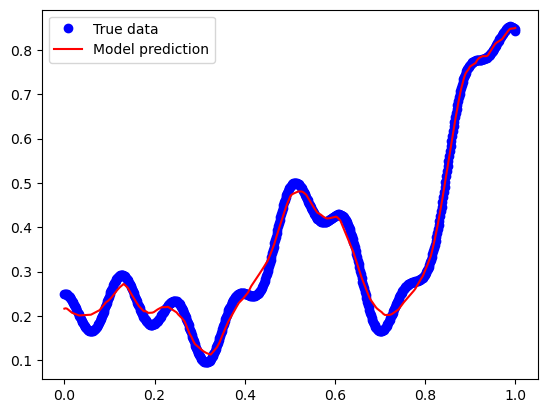

In [6]:
# ################## Final Prediction ##################
x_test = torch.unsqueeze(torch.linspace(0, 1, 1999), dim=1)
y_test = model(x_test)

# Plot the results
plt.plot(x[0:N_total], y[0:N_total], 'bo', label='True data')
plt.plot(x_test, y_test.detach().numpy(), 'r', label='Model prediction')
plt.legend()
plt.show()

### Problem 4.2 Determine appropriate mini-batch size = 16, epoch = 100

Epoch: 001, Train Loss: 20.4632916, Test Loss: 21.1496086
Epoch: 002, Train Loss: 11.2453420, Test Loss: 12.3400145
Epoch: 003, Train Loss: 9.9087901, Test Loss: 11.2133293
Epoch: 004, Train Loss: 9.3603978, Test Loss: 10.5421286
Epoch: 005, Train Loss: 7.1279855, Test Loss: 8.0017729
Epoch: 006, Train Loss: 4.5086163, Test Loss: 5.0775385
Epoch: 007, Train Loss: 2.8985459, Test Loss: 3.2626579
Epoch: 008, Train Loss: 2.2327487, Test Loss: 2.4915483
Epoch: 009, Train Loss: 1.7291094, Test Loss: 1.9289263
Epoch: 010, Train Loss: 1.1206206, Test Loss: 1.2632594
Epoch: 011, Train Loss: 0.6755160, Test Loss: 0.7543423
Epoch: 012, Train Loss: 0.5096188, Test Loss: 0.5315038
Epoch: 013, Train Loss: 0.4424562, Test Loss: 0.4302731
Epoch: 014, Train Loss: 0.3534248, Test Loss: 0.3353279
Epoch: 015, Train Loss: 0.2882117, Test Loss: 0.2828371
Epoch: 016, Train Loss: 0.2728086, Test Loss: 0.2817203
Epoch: 017, Train Loss: 0.2624435, Test Loss: 0.2744622
Epoch: 018, Train Loss: 0.2374812, Test Lo

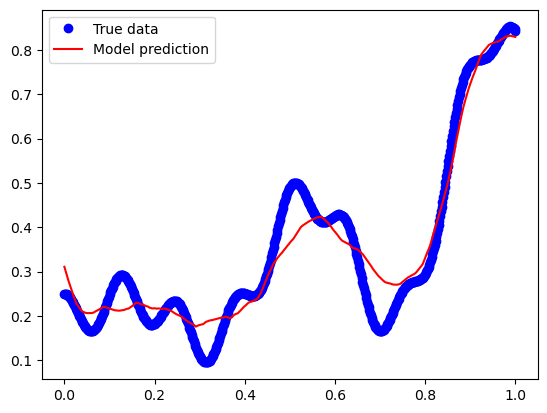

In [7]:
# ################## Part 1: Load data and create batch ##################
N_total = 600
N_train = 500
x = torch.unsqueeze(torch.linspace(0, 1, N_total), dim=1)
r = torch.randperm(N_total)
x = x[r, :]
y = 0.2 + 0.4 * torch.pow(x, 2) + 0.3 * x * torch.sin(15 * x) + 0.05 * torch.cos(50 * x)

class CustomDataset(Dataset):
    def __init__(self, x, y):
        self.y = y
        self.x = x

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        y1 = self.y[idx]
        x1 = self.x[idx]
        return (x1, y1)

# Change batch_size here to test different values
batch_size = 128  # Experiment with different batch sizes: 32, 64, 128
trainset = CustomDataset(x[0:N_train, :], y[0:N_train, :])
testset = CustomDataset(x[N_train:N_total, :], y[N_train:N_total, :])
train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size)

# ################## Part 2: Define Model ##################
model = nn.Sequential(
    nn.Linear(1, 1024, bias=True),
    nn.ReLU(),
    nn.Linear(1024, 1, bias=True)
)

def init_weights(m):
    if isinstance(m, nn.Linear):
        m.weight.data.uniform_(-1, 1)
        m.bias.data.uniform_(-1, 1)

model.apply(init_weights)

# ################## Part 3: Define Loss and Optimizer ##################
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ################## Part 4: Training and Testing ##################
def train_NN():
    model.train()
    for images, labels in train_loader:
        out = model(images)
        loss = criterion(out, labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    return loss

def test_NN(loader):
    model.eval()
    loss = 0
    with torch.no_grad():
        for images, labels in loader:
            out = model(images)
            loss += criterion(out, labels).item()
    loss = loss / len(loader)
    return loss

# Experiment with different numbers of epochs
N_epoch = 100 
train_loss = np.zeros((N_epoch, 1))
test_loss = np.zeros((N_epoch, 1))

for epoch in range(N_epoch):
    train_NN()
    train_loss[epoch, 0] = test_NN(train_loader)
    test_loss[epoch, 0] = test_NN(test_loader)
    print(f'Epoch: {epoch+1:03d}, Train Loss: {train_loss[epoch, 0]:.7f}, Test Loss: {test_loss[epoch, 0]:.7f}')

# ################## Final Prediction ##################
x_test = torch.unsqueeze(torch.linspace(0, 1, 1999), dim=1)
y_test = model(x_test)

# Plot the results
plt.plot(x[0:N_total], y[0:N_total], 'bo', label='True data')
plt.plot(x_test, y_test.detach().numpy(), 'r', label='Model prediction')
plt.legend()
plt.show()

### Problem 4.2 Determine appropriate mini-batch size = 64, epoch = 100

Epoch: 001, Train Loss: 15.6746806, Test Loss: 16.2465343
Epoch: 002, Train Loss: 2.8316783, Test Loss: 2.5567751
Epoch: 003, Train Loss: 5.4225901, Test Loss: 4.9618430
Epoch: 004, Train Loss: 2.1876323, Test Loss: 1.9957126
Epoch: 005, Train Loss: 0.6743857, Test Loss: 0.7711622
Epoch: 006, Train Loss: 0.7423441, Test Loss: 0.9157936
Epoch: 007, Train Loss: 0.2941593, Test Loss: 0.3851405
Epoch: 008, Train Loss: 0.2239520, Test Loss: 0.2369578
Epoch: 009, Train Loss: 0.1893579, Test Loss: 0.1959976
Epoch: 010, Train Loss: 0.1461559, Test Loss: 0.1745133
Epoch: 011, Train Loss: 0.1372006, Test Loss: 0.1686388
Epoch: 012, Train Loss: 0.1171399, Test Loss: 0.1371895
Epoch: 013, Train Loss: 0.1056668, Test Loss: 0.1206233
Epoch: 014, Train Loss: 0.0933011, Test Loss: 0.1111685
Epoch: 015, Train Loss: 0.0835575, Test Loss: 0.1031929
Epoch: 016, Train Loss: 0.0746684, Test Loss: 0.0925782
Epoch: 017, Train Loss: 0.0670494, Test Loss: 0.0831618
Epoch: 018, Train Loss: 0.0603105, Test Loss: 

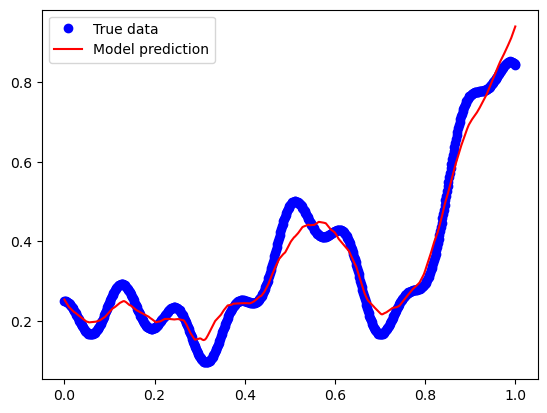

In [8]:
# ################## Part 1: Load data and create batch ##################
N_total = 600
N_train = 500
x = torch.unsqueeze(torch.linspace(0, 1, N_total), dim=1)
r = torch.randperm(N_total)
x = x[r, :]
y = 0.2 + 0.4 * torch.pow(x, 2) + 0.3 * x * torch.sin(15 * x) + 0.05 * torch.cos(50 * x)

class CustomDataset(Dataset):
    def __init__(self, x, y):
        self.y = y
        self.x = x

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        y1 = self.y[idx]
        x1 = self.x[idx]
        return (x1, y1)

# Change batch_size here to test different values
batch_size = 64  # Experiment with different batch sizes: 32, 64, 128
trainset = CustomDataset(x[0:N_train, :], y[0:N_train, :])
testset = CustomDataset(x[N_train:N_total, :], y[N_train:N_total, :])
train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size)

# ################## Part 2: Define Model ##################
model = nn.Sequential(
    nn.Linear(1, 1024, bias=True),
    nn.ReLU(),
    nn.Linear(1024, 1, bias=True)
)

def init_weights(m):
    if isinstance(m, nn.Linear):
        m.weight.data.uniform_(-1, 1)
        m.bias.data.uniform_(-1, 1)

model.apply(init_weights)

# ################## Part 3: Define Loss and Optimizer ##################
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ################## Part 4: Training and Testing ##################
def train_NN():
    model.train()
    for images, labels in train_loader:
        out = model(images)
        loss = criterion(out, labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    return loss

def test_NN(loader):
    model.eval()
    loss = 0
    with torch.no_grad():
        for images, labels in loader:
            out = model(images)
            loss += criterion(out, labels).item()
    loss = loss / len(loader)
    return loss

# Experiment with different numbers of epochs
N_epoch = 100 
train_loss = np.zeros((N_epoch, 1))
test_loss = np.zeros((N_epoch, 1))

for epoch in range(N_epoch):
    train_NN()
    train_loss[epoch, 0] = test_NN(train_loader)
    test_loss[epoch, 0] = test_NN(test_loader)
    print(f'Epoch: {epoch+1:03d}, Train Loss: {train_loss[epoch, 0]:.7f}, Test Loss: {test_loss[epoch, 0]:.7f}')

# ################## Final Prediction ##################
x_test = torch.unsqueeze(torch.linspace(0, 1, 1999), dim=1)
y_test = model(x_test)

# Plot the results
plt.plot(x[0:N_total], y[0:N_total], 'bo', label='True data')
plt.plot(x_test, y_test.detach().numpy(), 'r', label='Model prediction')
plt.legend()
plt.show()

### Problem 4.2 Determine appropriate mini-batch size = 128, epoch = 100

Epoch: 001, Train Loss: 22.4205217, Test Loss: 19.2805557
Epoch: 002, Train Loss: 5.3662879, Test Loss: 4.1010160
Epoch: 003, Train Loss: 0.8423916, Test Loss: 0.5674591
Epoch: 004, Train Loss: 2.5692085, Test Loss: 2.6380594
Epoch: 005, Train Loss: 4.0418289, Test Loss: 4.1497045
Epoch: 006, Train Loss: 3.1026638, Test Loss: 3.1714888
Epoch: 007, Train Loss: 1.2745357, Test Loss: 1.2814338
Epoch: 008, Train Loss: 0.2924522, Test Loss: 0.2166031
Epoch: 009, Train Loss: 0.3348801, Test Loss: 0.1885524
Epoch: 010, Train Loss: 0.5696861, Test Loss: 0.4075289
Epoch: 011, Train Loss: 0.4670437, Test Loss: 0.3442137
Epoch: 012, Train Loss: 0.1974116, Test Loss: 0.1294619
Epoch: 013, Train Loss: 0.0737167, Test Loss: 0.0414731
Epoch: 014, Train Loss: 0.1056979, Test Loss: 0.0857564
Epoch: 015, Train Loss: 0.1311933, Test Loss: 0.1138015
Epoch: 016, Train Loss: 0.0954354, Test Loss: 0.0802353
Epoch: 017, Train Loss: 0.0599697, Test Loss: 0.0470680
Epoch: 018, Train Loss: 0.0591872, Test Loss: 

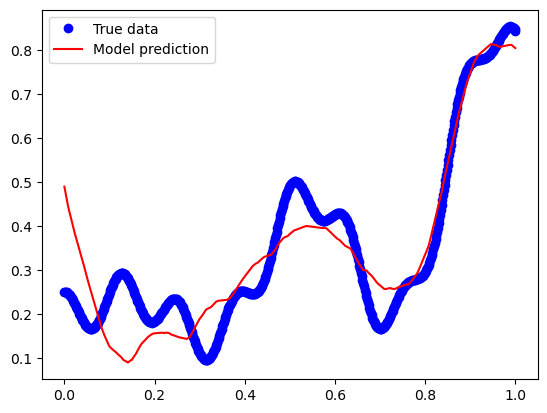

In [9]:
# ################## Part 1: Load data and create batch ##################
N_total = 600
N_train = 500
x = torch.unsqueeze(torch.linspace(0, 1, N_total), dim=1)
r = torch.randperm(N_total)
x = x[r, :]
y = 0.2 + 0.4 * torch.pow(x, 2) + 0.3 * x * torch.sin(15 * x) + 0.05 * torch.cos(50 * x)

class CustomDataset(Dataset):
    def __init__(self, x, y):
        self.y = y
        self.x = x

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        y1 = self.y[idx]
        x1 = self.x[idx]
        return (x1, y1)

# Change batch_size here to test different values
batch_size = 128  # Experiment with different batch sizes: 32, 64, 128
trainset = CustomDataset(x[0:N_train, :], y[0:N_train, :])
testset = CustomDataset(x[N_train:N_total, :], y[N_train:N_total, :])
train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size)

# ################## Part 2: Define Model ##################
model = nn.Sequential(
    nn.Linear(1, 1024, bias=True),
    nn.ReLU(),
    nn.Linear(1024, 1, bias=True)
)

def init_weights(m):
    if isinstance(m, nn.Linear):
        m.weight.data.uniform_(-1, 1)
        m.bias.data.uniform_(-1, 1)

model.apply(init_weights)

# ################## Part 3: Define Loss and Optimizer ##################
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ################## Part 4: Training and Testing ##################
def train_NN():
    model.train()
    for images, labels in train_loader:
        out = model(images)
        loss = criterion(out, labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    return loss

def test_NN(loader):
    model.eval()
    loss = 0
    with torch.no_grad():
        for images, labels in loader:
            out = model(images)
            loss += criterion(out, labels).item()
    loss = loss / len(loader)
    return loss

# Experiment with different numbers of epochs
N_epoch = 100 
train_loss = np.zeros((N_epoch, 1))
test_loss = np.zeros((N_epoch, 1))

for epoch in range(N_epoch):
    train_NN()
    train_loss[epoch, 0] = test_NN(train_loader)
    test_loss[epoch, 0] = test_NN(test_loader)
    print(f'Epoch: {epoch+1:03d}, Train Loss: {train_loss[epoch, 0]:.7f}, Test Loss: {test_loss[epoch, 0]:.7f}')

# ################## Final Prediction ##################
x_test = torch.unsqueeze(torch.linspace(0, 1, 1999), dim=1)
y_test = model(x_test)

# Plot the results
plt.plot(x[0:N_total], y[0:N_total], 'bo', label='True data')
plt.plot(x_test, y_test.detach().numpy(), 'r', label='Model prediction')
plt.legend()
plt.show()

Determine appropriate mini-batch size = 32